In [43]:
rm(list=ls())
###loading the models (heritable and non-heritable) as applied to all the test pops (not the test subset of the Baka, Himba, Khomani). 
###The plot_data has the results as applied to each individual from each dataset
###The results has the mean error for each pop across all the 100 heritable and 100 non-heritable models 

load("FINAL_models_to_all_pops_with_plot_data.RData")

###loading the mean error models from the African test data
load("closest_to_mean_models.RData")


all_pops_heritable_mean <- mean_afr_test_heritable

##find the application of the mean error model in each test population and rbind to the all_posp_heritable_mean
for(pop in c('Euro_saliva','HL_saliva','Af_Am_saliva', 'jap_saliva')){
    df <- heritable_model_plot_datas[[pop]]
    mean <- df[[which(names(df) == mean_heritable_model)]]
    mean$pop <- rep(pop, nrow(mean))
    mean$abs_diff <- abs(mean$Age - mean$predicted_age)
    mean$real_diff <- mean$Age - mean$predicted_age
    mean <- mean[, c("Age", "predicted_age", "pop", "abs_diff", "real_diff")]
    all_pops_heritable_mean <- rbind(all_pops_heritable_mean, mean)
}
table(all_pops_heritable_mean$pop)  


all_pops_non_heritable_mean <- mean_afr_test_non_heritable
for(pop in c('Euro_saliva','HL_saliva', 'Af_Am_saliva', 'jap_saliva')){
    df <- non_heritable_model_plot_datas[[pop]]
    mean <- df[[which(names(df) == mean_not_heritable_model)]]
    mean$pop <- rep(pop, nrow(mean))
    mean$abs_diff <- abs(mean$Age - mean$predicted_age)
    mean$real_diff <- mean$Age - mean$predicted_age
    mean <- mean[, c("Age", "predicted_age", "pop", "abs_diff", "real_diff")]
    all_pops_non_heritable_mean <- rbind(all_pops_non_heritable_mean, mean)
}

table(all_pops_non_heritable_mean$pop)  


Af_Am_saliva African test  Euro_saliva    HL_saliva   jap_saliva 
          64           44          130           69           19 


Af_Am_saliva African test  Euro_saliva    HL_saliva   jap_saliva 
          64           44          130           69           19 

Warning message:
"Setting row names on a tibble is deprecated."


pop,mean_error,label_y,pop_label
<chr>,<dbl>,<dbl>,<chr>
African test,4.253596,30,African test
HL_saliva,5.195035,24,Hispanic/Latino
Euro_saliva,4.666435,18,European
Af_Am_saliva,5.356765,12,African American
jap_saliva,4.435147,6,Japanese


Warning message:
"Setting row names on a tibble is deprecated."


pop,mean_error,label_y,pop_label
<chr>,<dbl>,<dbl>,<chr>
African test,4.639499,30,African test
HL_saliva,7.049201,24,Hispanic/Latino
Euro_saliva,5.694551,18,European
Af_Am_saliva,6.227721,12,African American
jap_saliva,5.088815,6,Japanese


Warning message:
"No shared levels found between `names(values)` of the manual scale and the data's colour values."
Warning message in get_plot_component(plot, "guide-box"):
"Multiple components found; returning the first one. To return all, use `return_all = TRUE`."
Warning message:
"No shared levels found between `names(values)` of the manual scale and the data's colour values."
Warning message:
"No shared levels found between `names(values)` of the manual scale and the data's colour values."


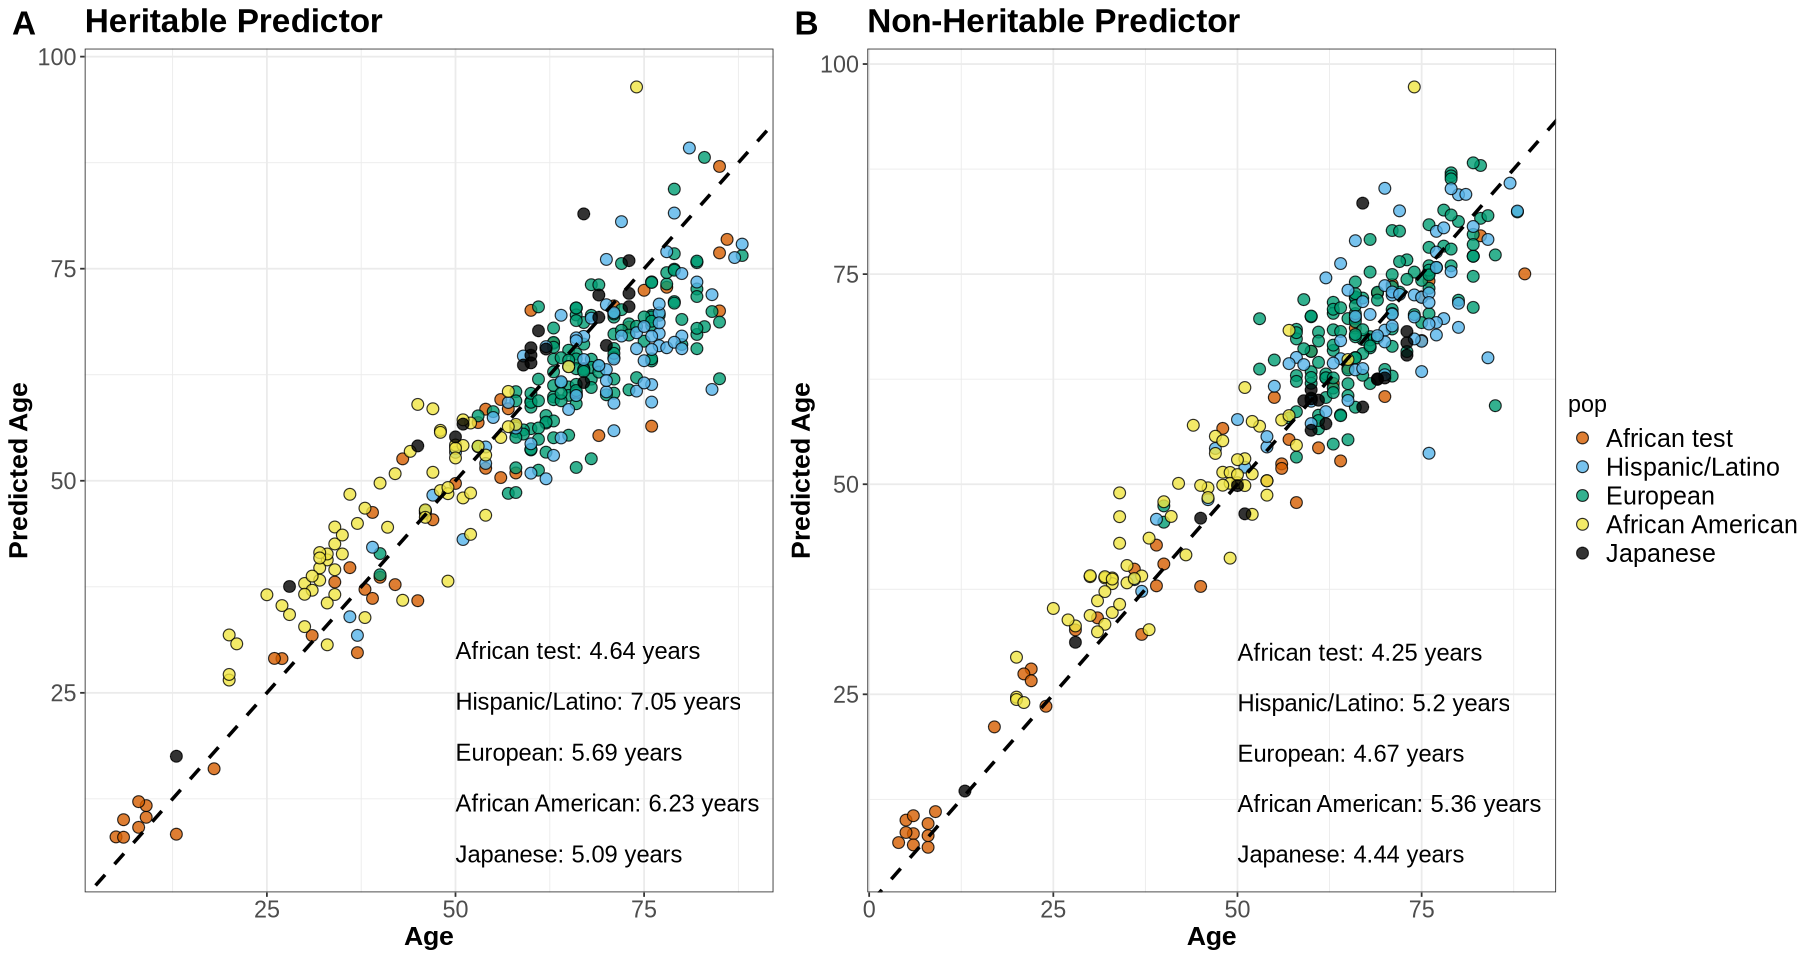

In [44]:
library(ggplot2)
library(dplyr)
library(cowplot)

custom_colors <- c(
  "African test" = "#D55E00",  # Red
  "Euro_saliva" = "#009E73",  # Green
  "HL_saliva" = "#56B4E9",  # Blue
  "Af_Am_saliva" = "#F0E442",  # Yellow
  "jap_saliva" = "black"  # Pink
)

# Define population name mappings
pop_labels <- c(
  "African test" = "African test",
  "Euro_saliva" = "European",
  "HL_saliva" = "Hispanic/Latino",
  "jap_saliva" = "Japanese",
  "Af_Am_saliva" = "African American"
)
pop_order = c("African test", "HL_saliva", "Euro_saliva", "Af_Am_saliva", "jap_saliva")
# Reorder non-heritable populations first
non_heritable_errors <- all_pops_non_heritable_mean %>%
  filter(pop %in% names(pop_labels)) %>%
  mutate(error = abs_diff) %>%
  group_by(pop) %>%
  summarize(mean_error = mean(error), .groups = "drop")

# Set the row names based on the pop column
row.names(non_heritable_errors) <- non_heritable_errors$pop

# Reorder the rows based on the pop_order
non_heritable_errors <- non_heritable_errors[pop_order, ]

# Now apply the y-value assignment and population label mapping
non_heritable_errors <- non_heritable_errors %>%
  mutate(
    label_y = seq(24, by = -6, length.out = n()) + 6,  # Assign y-values after reordering
    pop_label = recode(pop, !!!pop_labels)  # Apply mapping
  )

# Check the first few rows after reordering
head(non_heritable_errors)

# Reorder heritable populations first
heritable_errors <- all_pops_heritable_mean %>%
  filter(pop %in% names(pop_labels)) %>%
  mutate(error = abs_diff) %>%
  group_by(pop) %>%
  summarize(mean_error = mean(error), .groups = "drop")

# Set the row names based on the pop column
row.names(heritable_errors) <- heritable_errors$pop

# Reorder the rows based on the pop_order
heritable_errors <- heritable_errors[pop_order, ]

# Now apply the y-value assignment and population label mapping
heritable_errors <- heritable_errors %>%
  mutate(
    label_y = seq(24, by = -6, length.out = n()) + 6,  # Assign y-values after reordering
    pop_label = recode(pop, !!!pop_labels)  # Apply mapping
  )

# Check the first few rows after reordering
head(heritable_errors)
# Ensure the pop column is a factor with the correct levels in both data frames
all_pops_non_heritable_mean$pop <- factor(all_pops_non_heritable_mean$pop, levels = pop_order)
all_pops_heritable_mean$pop <- factor(all_pops_heritable_mean$pop, levels = pop_order)

# Plot for heritable populations
A <- ggplot(all_pops_heritable_mean %>% filter(pop %in% names(pop_labels)), 
       aes(x = Age, y = predicted_age, color = pop)) +
  geom_point(aes(fill = pop), shape = 21, size = 3, color = "black", alpha = 0.8) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "black", size = 1) +
  scale_fill_manual(values = custom_colors, labels = pop_labels) +
  scale_color_manual(values = custom_colors, labels = pop_labels) +
  theme_bw() +
  labs(x = "Age", y = "Predicted Age", color = "Population") +
  theme(
    axis.title = element_text(size = 16, face = "bold"),
    axis.text = element_text(size = 14),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 15),
    plot.title = element_text(size = 20, face = "bold")
  ) +
  geom_text(
    data = heritable_errors, 
    aes(x = 50, y = label_y, label = paste0(pop_label, ": ", round(mean_error, 2), " years")), 
    inherit.aes = FALSE, 
    size = 5, hjust = 0, color = "black"
  ) +
  ggtitle("Heritable Predictor")

# Plot for non-heritable populations
B <- ggplot(all_pops_non_heritable_mean %>% filter(pop %in% names(pop_labels)), 
       aes(x = Age, y = predicted_age, color = pop)) +
  geom_point(aes(fill = pop), shape = 21, size = 3, color = "black", alpha = 0.8) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "black", size = 1) +
  scale_color_manual(values = custom_colors, labels = pop_labels) +
  scale_fill_manual(values = custom_colors, labels = pop_labels) +
  theme_bw() +
  labs(x = "Age", y = "Predicted Age", color = "Population") +
  theme(
    axis.title = element_text(size = 16, face = "bold"),
    axis.text = element_text(size = 14),
    legend.title = element_blank(),
    legend.text = element_text(size = 15),
    plot.title = element_text(size = 20, face = "bold")
  ) +
  geom_text(
    data = non_heritable_errors,  
    aes(x = 50, y = label_y, label = paste0(pop_label, ": ", round(mean_error, 2), " years")), 
    inherit.aes = FALSE, 
    size = 5, hjust = 0, color = "black"
  ) +
  ggtitle("Non-Heritable Predictor")

# Extract the legend and remove it from the non-heritable plot
legend <- get_legend(A)  # Use A for legend since it's already sorted correctly
A <- A + theme(legend.position="none")
B <- B + theme(legend.position="none")

# Combine plots and legend
top <- plot_grid(A, B, legend, 
          ncol = 3, 
          rel_widths = c(1, 1, 0.3),  
          labels = c("A", "B"), 
          label_size = 20)
options(repr.plot.width = 15, repr.plot.height = 8)

top


In [45]:
###load the model results test subset of Himba, Baka, Khomani 
load("afr_test_models_all_age.RData")

error_df <- data.frame(pop = character(), model_type = character(), mean_abs_error = numeric(), model_name=character(), mean_real_error=numeric())
for(i in 1:100){
afr_her <- afr_test_heritable_models_all_age[[i]]

afr_her_error <- mean(afr_her$abs_diff)
afr_her_real_error <- mean(afr_her$real_diff)    
afr_her_model <- names(afr_test_heritable_models_all_age[i])
afr_non_her <- afr_test_non_heritable_models_all_age[[i]]
   
afr_non_her_error <- mean(afr_non_her$abs_diff)
afr_non_her_real_error <- mean(afr_non_her$real_diff)
afr_non_her_model <- names(afr_test_non_heritable_models_all_age[i])
row_her <- c(pop = "Afr_test", model_type = "Heritable", mean_abs_error = afr_her_error, model_name=afr_her_model, mean_real_error=afr_her_real_error )
row_non_her <- c(pop = "Afr_test", model_type = "Non-Heritable", mean_abs_error = afr_non_her_error, model_name=afr_non_her_model, mean_real_error=afr_non_her_real_error)
error_df <- rbind(error_df, row_her, row_non_her)
}
colnames(error_df) <- c("pop", "model_type", "mean_abs_error", "model_name", "mean_real_error")
for(i in 1:100){
for(pop in names(non_heritable_model_plot_datas)){
non_her_error <- mean(non_heritable_model_plot_datas[[pop]][[i]]$dif)
non_her_real_error <- mean(non_heritable_model_plot_datas[[pop]][[i]]$real_dif)
her_error <- mean(heritable_model_plot_datas[[pop]][[i]]$dif)
her_real_error <- mean(heritable_model_plot_datas[[pop]][[i]]$real_dif)    
her_name <- names(heritable_model_plot_datas[[pop]][i])
non_her_name <- names(non_heritable_model_plot_datas[[pop]][i])
row_her <- c(pop = pop, model_type = "Heritable", mean_abs_error = her_error, model_name=her_name, mean_real_error=her_real_error)
row_non_her <- c(pop = pop, model_type = "Non-Heritable", mean_abs_error = non_her_error, model_name=non_her_name, mean_real_error = non_her_real_error)
error_df <- rbind(error_df, row_her, row_non_her)
    }
}

In [46]:
error_df$mean_abs_error <- as.numeric(error_df$mean_abs_error)

error_df$pop_type <- paste0(error_df$pop, "_", error_df$model_type)
# Define population colors


# Define a fixed light grey fill for all boxplots
error_df$boxplot_fill <- "gainsboro"

DAT <- error_df
# Ensure 'group' has correct order with 'Heritable' and 'Non-Heritable' next to each other
DAT$group <- factor(DAT$pop_type)
DAT$group <- factor(DAT$group, levels = c("Afr_test_Heritable","Afr_test_Non-Heritable",  "HL_saliva_Heritable", "HL_saliva_Non-Heritable", "Euro_saliva_Heritable", "Euro_saliva_Non-Heritable","Af_Am_saliva_Heritable", "Af_Am_saliva_Non-Heritable", "jap_saliva_Heritable", "jap_saliva_Non-Heritable"))


# Create a significance dataframe for t-test results
signif_list <- list()

# Perform t-tests for each population
for(pop in unique(DAT$pop)) {
  # Filter the data for each population
  pop_data <- DAT[DAT$pop == pop, ]
  
  # Perform a t-test between Non-Heritable and Heritable groups
  t_test_result <- t.test(mean_abs_error ~ model_type, data = pop_data)
  
  # Extract the p-value from the t-test result
  p_value <- t_test_result$p.value
  
  # Assign significance labels based on p-value
  p_label <- ifelse(p_value < 0.001, "***",
                    ifelse(p_value < 0.01, "**",
                           ifelse(p_value < 0.05, "*", "ns")))
  
  # Calculate dynamic y_position to avoid overlap (using max(mean_abs_error) + offset)
  y_pos <- max(pop_data$mean_abs_error) + 5  # Adjust the offset (e.g., 5) as needed
  
  # Determine x positions for each group (Heritable vs Non-Heritable) for this population
  xmin_group <- which(levels(DAT$group) == paste0(pop, "_Heritable"))
  xmax_group <- which(levels(DAT$group) == paste0(pop, "_Non-Heritable"))
  
  # Store the results for each population in a list
  signif_list[[pop]] <- data.frame(
    group = paste0(pop, "_Heritable"),
    p_label = p_label,
    y_pos = 12.5,  # Dynamic position based on maximum value
    xmin_group = xmin_group,  # Correct numeric position for "Heritable"
    xmax_group = xmax_group  # Correct numeric position for "Non-Heritable"
  )
}

# Combine the results into a data frame
signif_data <- do.call(rbind, signif_list)

In [47]:
library(ggplot2)
library(dplyr)
library(ggsignif)

# Define colors for each population
custom_colors <- c(
  "HL_saliva" = rgb(86/255, 180/255, 233/255),  # Blue
  "Euro_saliva" = rgb(0/255, 159/255, 115/255),  # Green
  "African test" = "#D55E00",  # Red
  "jap_saliva" = "black",  # Black
  "Af_Am_saliva" = "#F0E442"  # Yellow
)

# Adjust colors for Heritable vs Non-Heritable
popColours <- c(
  "Afr_test_Non-Heritable" = "#D55E00",  # Red
  "Afr_test_Heritable" = "#D55E00",

  "HL_saliva_Non-Heritable" = "#56B4E9",  # Blue
  "HL_saliva_Heritable" = "#56B4E9",

  "Euro_saliva_Non-Heritable" = "#009E73",  # Green
  "Euro_saliva_Heritable" = "#009E73",

  "Af_Am_saliva_Non-Heritable" = "#F0E442",  # Yellow
  "Af_Am_saliva_Heritable" = "#F0E442",  

  "jap_saliva_Non-Heritable" = "black",
  "jap_saliva_Heritable" = "black"
)

# Calculate means
means <- DAT %>%
  group_by(group) %>%
  summarise(mean_val = mean(mean_abs_error))

# Ensure alpha values are assigned to DAT
DAT <- DAT %>%
  mutate(
    alpha_val = ifelse(grepl("Non-Heritable", group), 0.5, 1)  # 50% transparent for heritable
  )

# Filter out non-significant comparisons
signif_data_filtered <- signif_data %>%
  filter(p_label != "ns")
head(signif_data_filtered)

# Create the plot
p <- ggplot(DAT, aes(x = group, y = mean_abs_error, fill = group)) +
  # Violin plot with custom alpha directly in the geom
  geom_violin(color = "gray20", size = 1, aes(alpha = alpha_val), show.legend = FALSE) +
  
  # Boxplot with white fills
  geom_boxplot(width = 0.1, color = "gray20", fill = "white", outlier.size = 1, show.legend = FALSE) +
  
  # Add significance bars (only for significant comparisons)
  geom_signif(
    data = signif_data_filtered,
    aes(
      x = group,
      y_position = y_pos,
      annotations = p_label,
      xmin = xmin_group,
      xmax = xmax_group
    ),
    manual = TRUE,
    inherit.aes = FALSE,
    tip_length = 0.02,
    size = 0.5,  # Increase the size (thickness) of the bars
    textsize = 6 
  ) +
  
  # # Add mean values above boxplots
  # geom_text(
  #   data = means,
  #   aes(x = group, y = mean_val , label = round(mean_val, 2)),
  #   color = "black",
  #   size = 5,
  #   vjust = -0.5
  # ) +
  
  # Apply manual color scaling
  scale_fill_manual(values = popColours) +
  scale_alpha_identity() +  # Use the alpha values defined in 'DAT'
  
   scale_x_discrete(labels = c(
    "HL_saliva_Heritable" = "Hispanic/Latino Heritable", 
    "HL_saliva_Non-Heritable" = "Hispanic/Latino Non-Heritable",
    "Euro_saliva_Heritable" = "European Heritable", 
    "Euro_saliva_Non-Heritable" = "European Non-Heritable", 
    "Afr_test_Heritable" = "African Test Heritable", 
    "Afr_test_Non-Heritable" = "African Test Non-Heritable", 
    "Af_Am_saliva_Heritable" = "African American Heritable", 
    "Af_Am_saliva_Non-Heritable" = "African American Non-Heritable", 
    "jap_saliva_Heritable" = "Japanese Heritable", 
    "jap_saliva_Non-Heritable" = "Japanese Saliva Non-Heritable"
  )) +
  labs(
    title = "Mean Absolute Error by Population and Model Type",
    y = "Mean absolute error",
    x = NULL
  ) +
    expand_limits(y = 13) +
  theme_bw() +
  theme(
    axis.text.x = element_text(size = 14, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16, face="bold"),
    axis.title.y = element_text(size = 16, face="bold"),
    plot.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 16),
    plot.margin = margin(20, 20, 20, 20)
  )

# Display the plot
p <- plot_grid(p, labels="C", label_size=20)


,group,p_label,y_pos,xmin_group,xmax_group
,<chr>,<chr>,<dbl>,<int>,<int>
Afr_test,Afr_test_Heritable,***,12.5,1,2
Euro_saliva,Euro_saliva_Heritable,***,12.5,5,6
HL_saliva,HL_saliva_Heritable,*,12.5,3,4
jap_saliva,jap_saliva_Heritable,***,12.5,9,10


Warning message in geom_signif(data = signif_data_filtered, aes(x = group, y_position = y_pos, :
"Ignoring unknown aesthetics: y_position, annotations, xmin, and xmax"


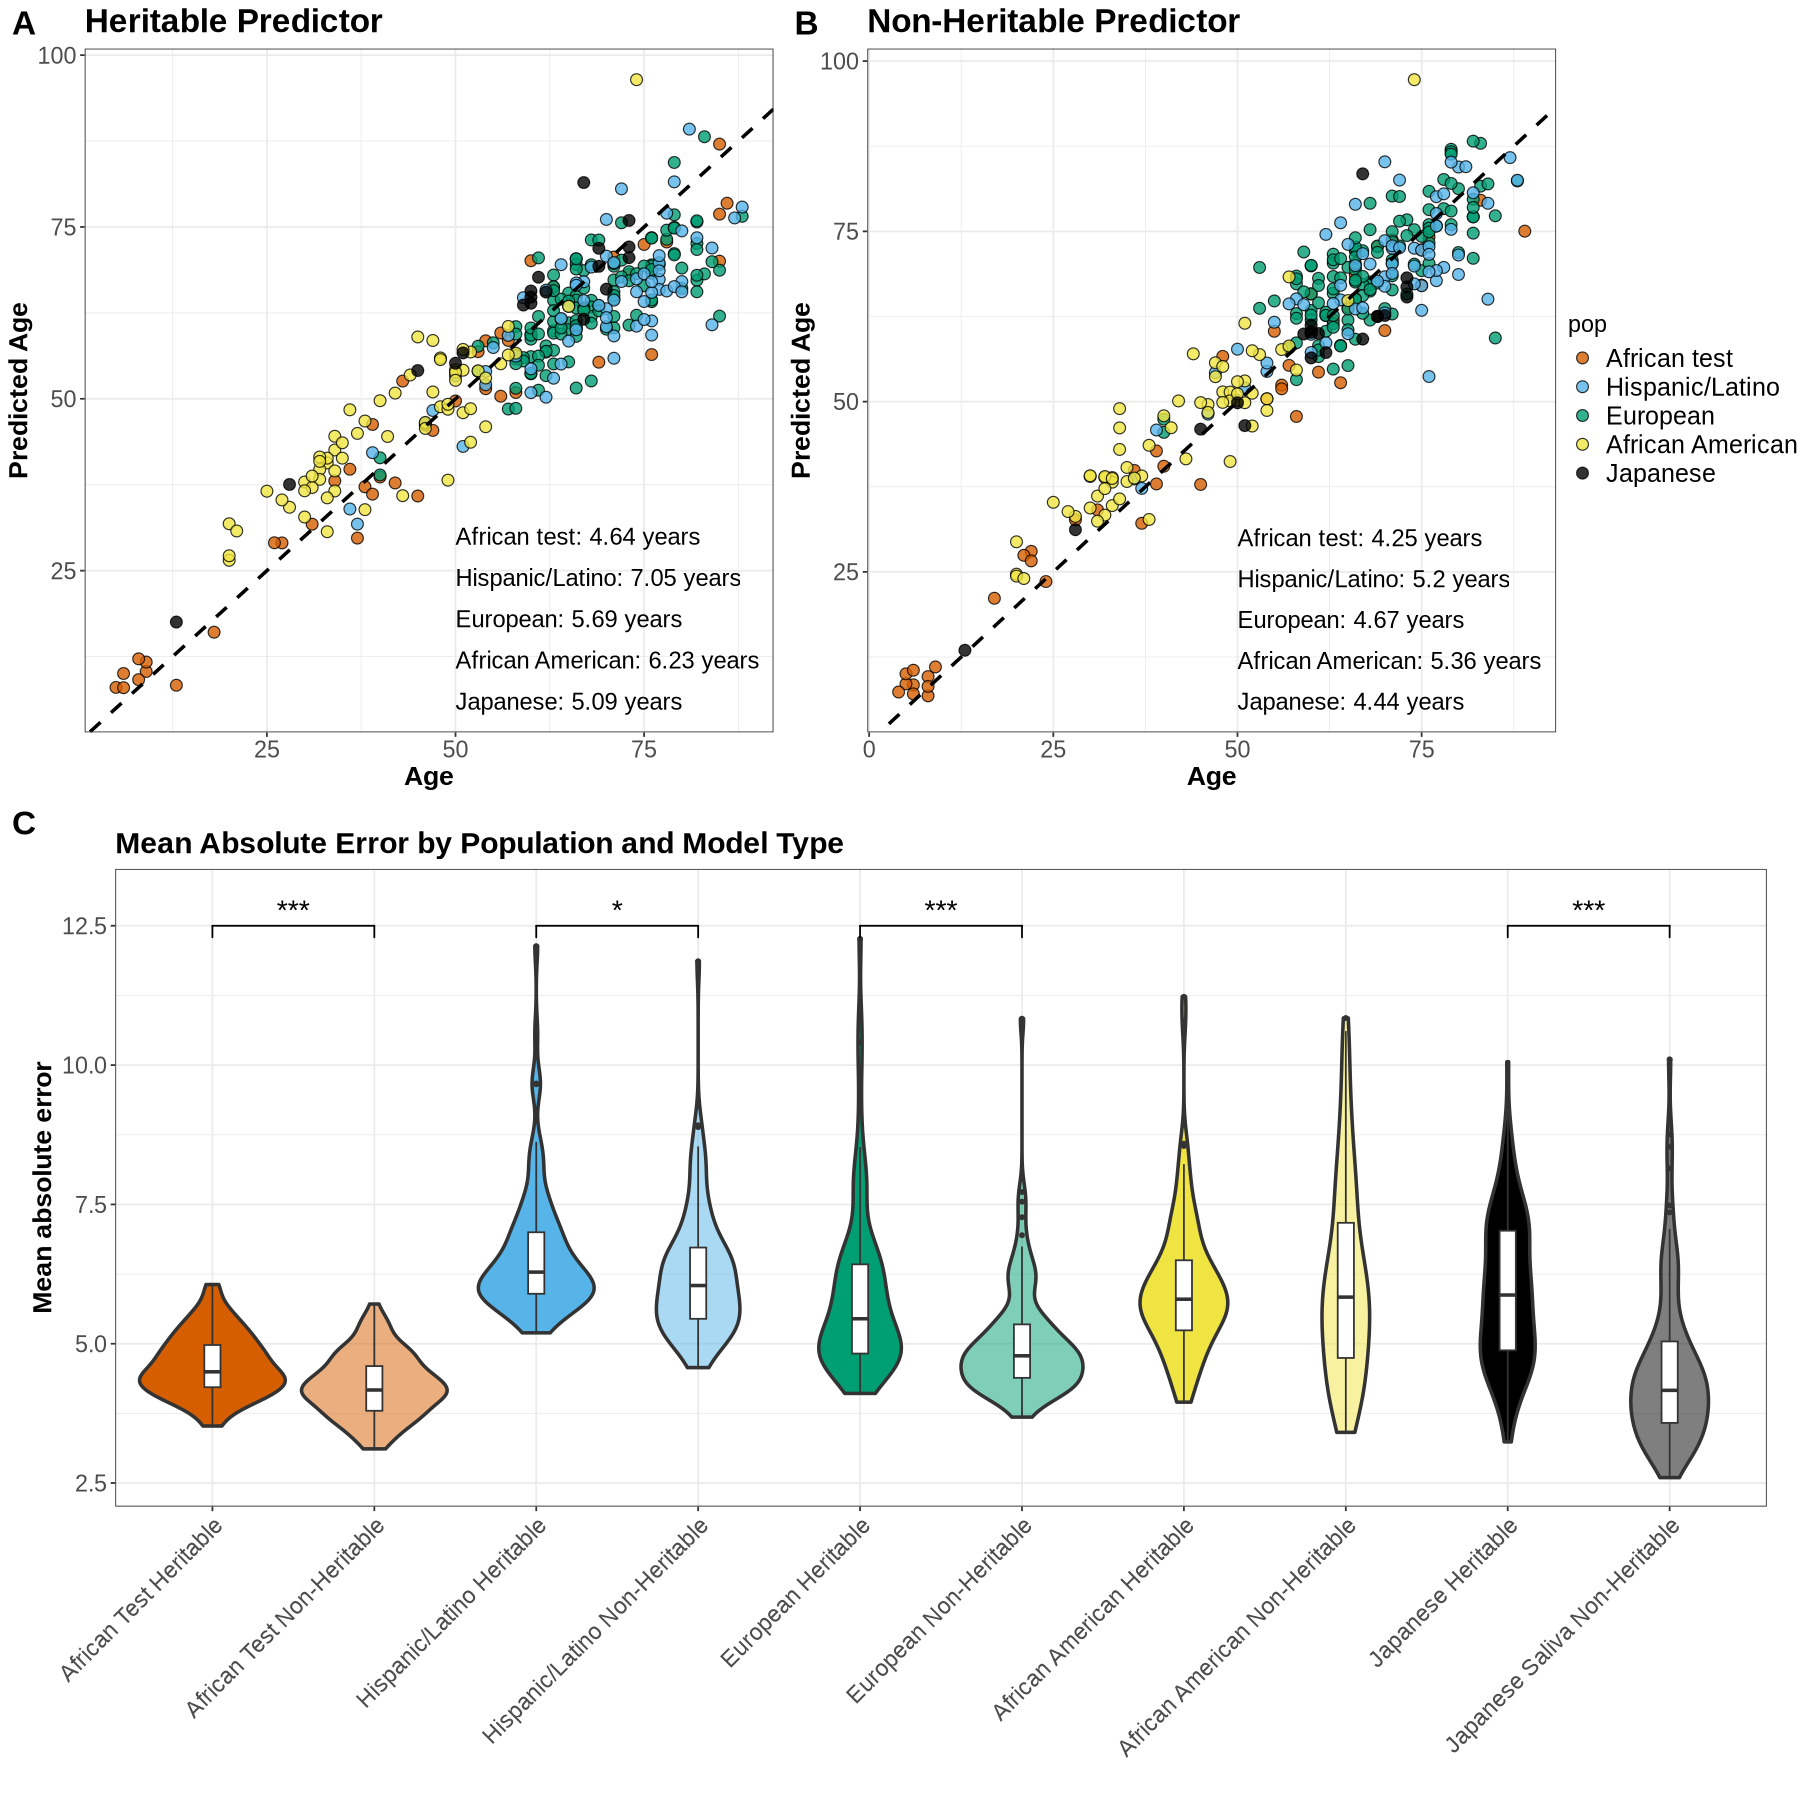

In [48]:
options(repr.plot.width = 15, repr.plot.height = 15)
plot_grid(top, p, rel_heights=c(.8, 1), nrow=2)